In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from classy import Class

In [2]:
kk = np.logspace(-3,1,1000) # in units 1/Mpc
kmax=kk[-1]
Odm = 0.25

In [3]:
ref = Class()
ref.set(
    {
        'output' : 'mPk',
        'P_k_max_1/Mpc' : kmax,
        'Omega_cdm' : Odm
    }
)
ref.compute()
#h=ref.h()
pk_ref = np.vectorize(ref.pk)(kk,0)

m= 10000.0  gamma0= 9.999999999999999e-23
m= 100000.0  gamma0= 1e-29
m= 1000000.0  gamma0= 1.0000000000000001e-36


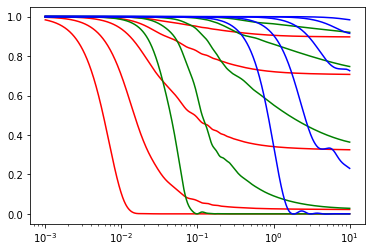

In [6]:
M=Class()

alpha=100.

f_list = [1.e-2,10.**-1.5,1.e-1,10.**-0.5,0.99999999]

m_list = [1.e4,1.e5,1.e6]
color_list = ['r','g','b']

for i in range(len(m_list)):
    color = color_list[i]
    m = m_list[i]
    alpha3 = alpha**3
    print ('m=',m,' gamma0=',alpha3*m**-7)
    for f in f_list:
        M.set({
            'output' : 'mPk',
            'P_k_max_1/Mpc' : kmax,
            'Omega_cdm' : Odm*(1-f),
            'Omega_candm' : Odm * f,
            'n_index_candm':0,
            'M_candm':m,
            'alpha3_candm':alpha3,
            'background_method':1
        })
        M.compute()
        pk_M = np.vectorize(M.pk)(kk,0)
        plt.semilogx(kk,pk_M/pk_ref,color)